Import thư viện

In [ ]:
import numpy as np 
from numpy import log,dot,exp,shape
import pandas as pd
import matplotlib.pyplot as plt # Các bạn có thể thử plot chart bằng plotly
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split  

# 1: Implement hàm sigmoid

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# 2: Implement lại Logistic Regression

In [ ]:
def standardize(X_train):
    # Normalize lại các giá trị để có thể tính toán một cách "mượt" hơn 
    # Sau này, khi xây dựng model, các bạn nên normalize lại dữ liệu trước khi train
    mu = np.mean(X_train, axis=0) #mean theo cột
    sd = np.std(X_train, axis=0) #standard deviation
    X_train_std = (X_train - mu) / sd 
    return X_train_std

def f1_score(y,y_hat):
    y = np.array(y)
    y_hat = np.array(y_hat)
    #chuyển về numpy array vì không thể thực hiện phép & (bitwise) với list

    truepositive = np.sum((y == 1) & (y_hat == 1))
    falsepositive = np.sum((y == 0) & (y_hat == 1))
    falsenegative = np.sum((y == 1) & (y_hat == 0))
    #sum lại tổng số lần thỏa mãn điều kiện
    
    precision = truepositive / (truepositive + falsepositive)
    recall = truepositive / (truepositive + falsenegative)
    f1 = 2 * precision * recall / (precision + recall)
    return f1

In [ ]:
class LogisticRegression:
    def __init__(self, lr = 0.01, n_iters = 1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        #chứa các w (weights) của x (features)
        self.bias = None
        #tách riêng bias
        self.losses = []

    def _initialize(self,X):
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

    def fit(self, X, y):
        self._initialize(X)
        for i in range(self.n_iters):
            linear_pred = np.dot(X, self.weights) + self.bias
            #tính linear
            y_pred = sigmoid(linear_pred)
            #dùng sigmoid để uốn linear

            loss = -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred)) 
            #tính loss
            self.losses.append(loss)
            #lưu loss

            dw = (1/len(X)) * np.dot(X.T, (y_pred - y))
            db = (1/len(X)) * np.sum(y_pred - y)
            #tính đạo hàm với weight và bias

            self.weights = self.weights - self.lr*dw
            self.bias = self.bias - self.lr*db
            #update weight và bias

    @property
    def loss_hist(self):
        return self.losses
        #chứa giá trị loss khi train để vẽ đồ thị loss

    def predict(self,X):
        linear_pred = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(linear_pred)
        class_pred = [0 if y < 0.5 else 1 for y in y_pred ]
        return class_pred


# 3a: Tạo dữ liệu

In [ ]:
X, y = make_classification(n_samples = 200, n_features = 2, 
                           n_informative = 2, n_redundant = 0, 
                           n_repeated = 0, n_classes = 2, 
                           n_clusters_per_class = 1, random_state = 42)
''' 
n_samples là số lượng mẫu dữ liệu được tạo ra.
n_features là số lượng feature của mỗi mẫu.
n_informative là số lượng feature có tác động đến kết quả dự đoán.
n_redundant là số lượng feature trùng lặp với các feature khác.
n_repeated là số lượng feature trùng lặp với chính nó.
n_classes là số lượng lớp của bài toán classification.
n_clusters_per_class là số lượng cluster của mỗi lớp.
'''

' \nn_samples là số lượng mẫu dữ liệu được tạo ra.\nn_features là số lượng feature của mỗi mẫu.\nn_informative là số lượng feature có tác động đến kết quả dự đoán.\nn_redundant là số lượng feature trùng lặp với các feature khác.\nn_repeated là số lượng feature trùng lặp với chính nó.\nn_classes là số lượng lớp của bài toán classification.\nn_clusters_per_class là số lượng cluster của mỗi lớp.\n'

#3b: Visualize dữ liệu

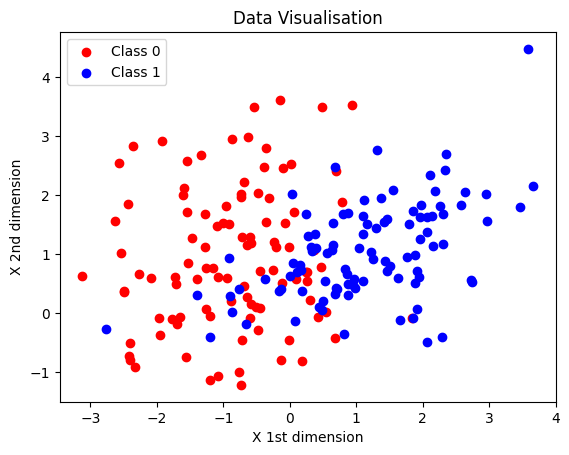

In [ ]:
import matplotlib.pyplot as plt

# plot dữ liệu
plt.scatter(X[y==0][:,0], X[y==0][:,1], color='red', label='Class 0')
plt.scatter(X[y==1][:,0], X[y==1][:,1], color='blue', label='Class 1')

plt.title('Data Visualisation')
plt.xlabel('X 1st dimension')
plt.ylabel('X 2nd dimension')
plt.legend()
plt.show()


# 3c: Chia dữ liệu thành train và test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


# 4: Fit dữ liệu với Logistic Regression

In [ ]:
X_train_std = standardize(X_train)
reg = LogisticRegression()
reg.fit (X_train_std, y_train)


# 4b: Tính f1-score

In [ ]:
y_test_pred = reg.predict(X_test)
f1 = f1_score(y_test, y_test_pred)
print(f1)


0.8421052631578947


# 4c: Visualize loss

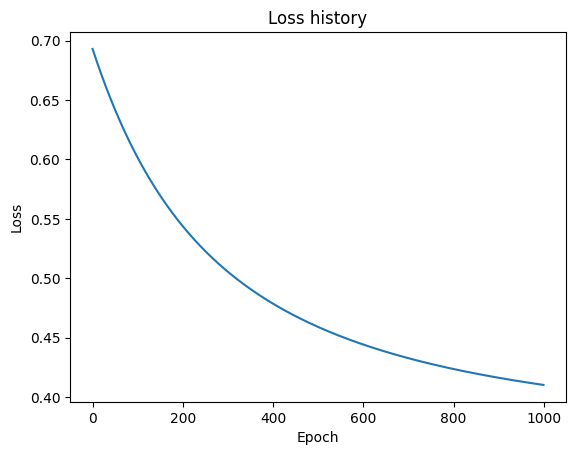

In [ ]:
plt.plot(reg.loss_hist)
plt.title('Loss history')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [1]:
#@title # 5c Visualize loss với learning rate và iter khác nhau {"display-mode": "form"}
# Các bạn có thể thêm param "run": "auto" vào trong dictionary để cell tự động chạy khi bạn chỉnh param
lr = 0.1665 #@param {type:"slider", min:0, max:1, step:0.0005}
iter = 1000 #@param {type:"slider", min:0, max:1000, step:1}

# Phần trên dành cho các bạn sử dụng Google Colab, với các bạn sử dụng Jupyter , các bạn hãy xoá tất cả và chạy code trong ô này nhé!
model = LogisticRegression(lr = lr, n_iters= iter)

# Train mô hình
model.fit(X_train, y_train)

# Vẽ đồ thị loss được lưu ở loss_hist
plt.plot(model.loss_hist)
plt.title("Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

NameError: ignored